In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (ex: pd.read_csv)
import matplotlib.pyplot as plt # plotting

In [2]:
#Your method section should set out how you cleaned the data:
#Remove delimeter from dataset
df_peugot_1=pd.read_csv("peugeot_207_01.csv", delimiter=";")
df_peugot_2=pd.read_csv("peugeot_207_02.csv", delimiter=";")
df_corsa_1=pd.read_csv("opel_corsa_01.csv", delimiter=";")
df_corsa_2=pd.read_csv("opel_corsa_02.csv", delimiter=";")

#Print and check the dataset from cars
#df_peugot_1.head()
#df_corsa_2.tail()

In [3]:
#concatenate all the car datasets into one big file
df_allcars=pd.concat([df_peugot_1, df_peugot_2, df_corsa_1, df_corsa_2])
df_allcars.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-13.399994,20.699999,6.060,115.840061,-4.500000,1.0548,38.039215,31.0,101.0,798.0,6.22,15.0,-0.5982,27.919697,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-13.200005,17.100000,6.345,117.200816,-3.599998,0.9012,38.039215,31.0,101.0,797.5,6.27,15.0,-0.5244,26.458355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-13.200005,14.400000,6.585,117.559595,-2.700001,0.9331,90.588234,32.0,101.0,797.5,6.27,15.0,-0.5068,26.458355,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,-11.800003,14.400000,6.825,117.801222,0.000000,0.9878,90.588234,32.0,101.0,726.0,8.63,15.0,-0.4882,26.004126,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,-19.800003,14.400000,7.065,117.925697,0.000000,1.1316,92.941177,32.0,101.0,784.0,8.88,15.0,-0.6712,25.295498,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [4]:
#Fill in all the NA/NaN values with 0 to make sure no error in dataset
df_allcars.describe()
df_allcars = df_allcars.fillna(0)

#Since the data types are almost all the same floating integers, just columns that are not of concern remove roadSurface and drivingStyle
#The team will focus on traffic only
df_allcarsnew=df_allcars.drop(["roadSurface","drivingStyle"], axis=1)

#Check all data for data types
#df_allcarsnew.info()

In [5]:
#Convert datatype to float
df_allcarsnew.iloc[:,0:15] = df_allcars.iloc[:,0:15].astype('float')

#Check all data for data types
#df_allcarsnew.info()

In [6]:
#Assign the dependent variables
X = df_allcarsnew.drop(["traffic"], axis=1)
X.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,59.0,-13.399994,20.699999,6.060,115.840061,-4.500000,1.0548,38.039215,31.0,101.0,798.0,6.22,15.0,-0.5982,27.919697
1,60.0,-13.200005,17.100000,6.345,117.200816,-3.599998,0.9012,38.039215,31.0,101.0,797.5,6.27,15.0,-0.5244,26.458355
2,61.0,-13.200005,14.400000,6.585,117.559595,-2.700001,0.9331,90.588234,32.0,101.0,797.5,6.27,15.0,-0.5068,26.458355
3,62.0,-11.800003,14.400000,6.825,117.801222,0.000000,0.9878,90.588234,32.0,101.0,726.0,8.63,15.0,-0.4882,26.004126
4,63.0,-19.800003,14.400000,7.065,117.925697,0.000000,1.1316,92.941177,32.0,101.0,784.0,8.88,15.0,-0.6712,25.295498


In [7]:
df_allcarsnew['traffic'].unique()

array(['LowCongestionCondition', 'NormalCongestionCondition',
       'HighCongestionCondition'], dtype=object)

In [8]:
#Assign the independent variable
#Y = df_allcarsnew.traffic
#print(Y)

In [9]:
#Identify the unique object parameters from Traffic
traffic_unique=list(df_allcarsnew["traffic"].unique())
print(traffic_unique)

['LowCongestionCondition', 'NormalCongestionCondition', 'HighCongestionCondition']


In [10]:
#Convert unique values into 1x3 matrix
one_hot_encoding = pd.get_dummies(df_allcarsnew[["traffic"]])
one_hot_encoding.head()

,traffic_HighCongestionCondition,traffic_LowCongestionCondition,traffic_NormalCongestionCondition
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [11]:
#only run once
one_hot_encoding['Target']= one_hot_encoding.values.tolist()
one_hot_encoding.head()

,traffic_HighCongestionCondition,traffic_LowCongestionCondition,traffic_NormalCongestionCondition,Target
0,0,1,0,"[0, 1, 0]"
1,0,1,0,"[0, 1, 0]"
2,0,1,0,"[0, 1, 0]"
3,0,1,0,"[0, 1, 0]"
4,0,1,0,"[0, 1, 0]"


In [12]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

#Perform label encoding
df_allcarsnew['traffic'] = lab.fit_transform(df_allcarsnew['traffic'])
y = df_allcarsnew['traffic']

In [13]:
#Get numbers for each unique traffic dataset
df_allcarsnew['traffic'].value_counts()

1    17764
0     3017
2     2994
Name: traffic, dtype: int64

In [14]:
# USE LOGISTIC REGRESSION
#Avoid imbalance in the data set, use scaler to transform values from 0 to 1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=50000))
pipe.fit(X_train, y_train)

y_test_pred=pipe.predict(X_test)
y_train_pred=pipe.predict(X_train)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14265, 15) (9510, 15) (14265,) (9510,)


In [15]:
print("model score: ", pipe.score(X_test, y_test))

model score:  0.7934805467928496


C:\Users\46736\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\46736\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


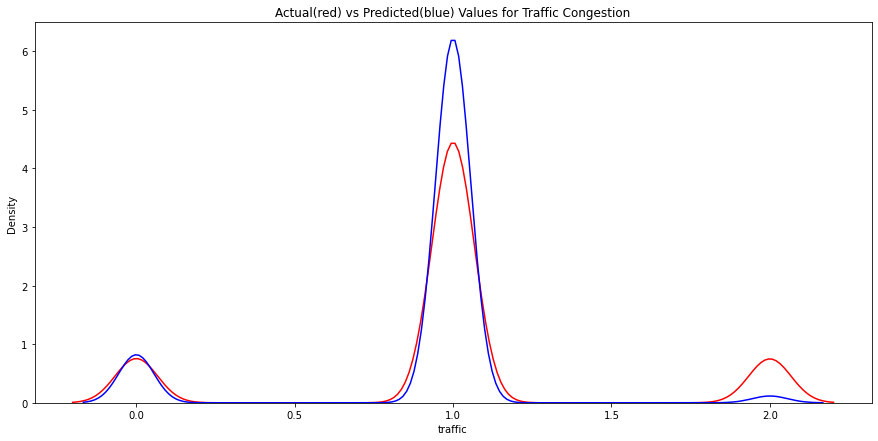

In [16]:
import seaborn as sns

plt.figure(figsize=(15, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual(red) vs Predicted(blue) Values for Traffic Congestion')
plt.show()
plt.close()

In [17]:
XX = df_allcarsnew.drop(["traffic"], axis=1)
yy = df_allcarsnew['traffic']

In [18]:
# USE SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=1)
pipe2 = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=50))])
pipe2.fit(XX_train, yy_train)

yy_test_pred=pipe2.predict(XX_test)
yy_train_pred=pipe2.predict(XX_train)

print(XX_train.shape, XX_test.shape, yy_train.shape, yy_test.shape)

(19020, 15) (4755, 15) (19020,) (4755,)


In [19]:
print("model score: ", pipe2.score(XX_test, yy_test))

model score:  0.9800210304942166


C:\Users\46736\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\46736\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


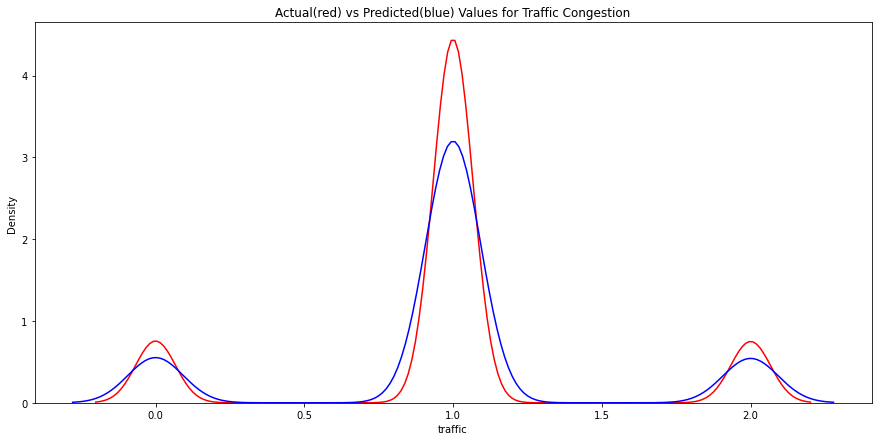

In [20]:
import seaborn as sns

plt.figure(figsize=(15, 7))
ax = sns.distplot(yy, hist=False, color="r", label="Actual Value")
sns.distplot(yy_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)

plt.title('Actual(red) vs Predicted(blue) Values for Traffic Congestion')
plt.show()
plt.close()